# Análise dados Titanic

**Vamos começar importando as bibliotecas necessária**

In [ ]:
import pandas as pd
import numpy as np

**Subir CSV para Colab, ler CSV para datataframe e apresentar uma visão geral dos dados**

In [ ]:
df = pd.read_csv('titanic.csv')

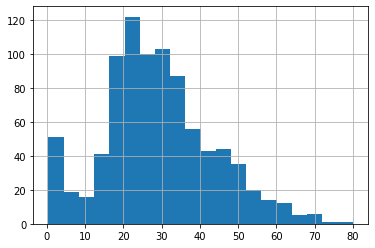

In [ ]:
df['Age'].hist(bins = 20)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,665,1,3.0,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,-3.123435,NaN,S
1,646,1,1.0,"Harper, Mr. Henry Sleeper",MALE,48.0,1,0,PC 17572,76.729200,D33,C
2,181,0,3.0,"Sage, Miss. Constance Gladys",FEMALE,NaN,8,2,CA. 2343,69.550000,NaN,S
3,292,1,1.0,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.079200,B49,C
4,823,0,1.0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.000000,NaN,S
5,400,1,2.0,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.650000,NaN,PORT S
6,541,1,1.0,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000000,B22,PORT S
7,341,1,2.0,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.000000,F2,PORT S
8,581,1,NaN,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.000000,NaN,S
9,843,1,1.0,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.000000,NaN,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1098.000000,1098.000000,983.000000,875.000000,1098.000000,1098.000000,1082.000000
mean,450.107468,0.386157,2.323499,29.457909,0.526412,0.389800,29.271991
std,258.784719,0.487089,0.831610,14.437504,1.142425,0.810801,48.490367
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,-88.096315
25%,226.250000,0.000000,2.000000,20.000000,0.000000,0.000000,7.859400
50%,449.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,675.750000,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1098 non-null   int64  
 1   Survived     1098 non-null   int64  
 2   Pclass       983 non-null    float64
 3   Name         1098 non-null   object 
 4   Sex          1098 non-null   object 
 5   Age          875 non-null    float64
 6   SibSp        1098 non-null   int64  
 7   Parch        1098 non-null   int64  
 8   Ticket       1098 non-null   object 
 9   Fare         1082 non-null   float64
 10  Cabin        250 non-null    object 
 11  Embarked     1095 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 103.1+ KB


**Visão detalhada das colunas**

In [ ]:
df['Sex'].value_counts()

male      471
MALE      241
female    238
FEMALE    148
Name: Sex, dtype: int64

In [ ]:
df['Age'].value_counts(dropna = False)

NaN      223
24.00     41
28.00     34
22.00     32
19.00     31
        ... 
0.92       1
23.50      1
12.00      1
55.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [ ]:
df['Pclass'].value_counts(dropna = False)

3.0    550
1.0    232
2.0    201
NaN    115
Name: Pclass, dtype: int64

In [ ]:
df['Fare'].quantile([0.5])

0.5    13.0
Name: Fare, dtype: float64

**Analisar e corrigir dados duplicados**

In [ ]:
df.duplicated().sum()

154

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

**Analisar e corrigir dados faltantes/incorretos**

In [ ]:
df['Sex'] =  df['Sex'].str.upper()

In [ ]:
df['Sex'].value_counts(dropna = False)

MALE      613
FEMALE    331
Name: Sex, dtype: int64

In [ ]:
df[df['Age'].isna()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,181,0,3.0,"Sage, Miss. Constance Gladys",FEMALE,NaN,8,2,CA. 2343,69.550000,NaN,S
13,728,1,NaN,"Mannion, Miss. Margareth",FEMALE,NaN,0,0,36866,7.737500,NaN,PORT Q
14,414,0,2.0,"Cunningham, Mr. Alfred Fleming",MALE,NaN,0,0,239853,0.000000,NaN,PORT S
16,389,0,3.0,"Sadlier, Mr. Matthew",MALE,NaN,0,0,367655,7.729200,NaN,PORT Q
17,739,0,3.0,"Ivanoff, Mr. Kanio",MALE,NaN,0,0,349201,7.895800,NaN,S
19,681,0,NaN,"Peters, Miss. Katie",FEMALE,NaN,0,0,330935,8.137500,NaN,Q
26,833,0,3.0,"Saad, Mr. Amin",MALE,NaN,0,0,2671,7.229200,NaN,PORT C
37,741,1,1.0,"Hawksford, Mr. Walter James",MALE,NaN,0,0,16988,30.000000,D45,PORT S
39,565,0,3.0,"Meanwell, Miss. (Marion Ogden)",FEMALE,NaN,0,0,SOTON/O.Q. 392087,-3.674268,NaN,S
51,359,1,3.0,"McGovern, Miss. Mary",FEMALE,NaN,0,0,330931,7.879200,NaN,PORT Q


In [ ]:
len(df[df['Age'].isna()]) / len(df)

0.20021186440677965

In [ ]:
df_age_missing = df[df['Age'].isna()]

In [ ]:
df_age_missing['Sex'].value_counts() / df['Sex'].value_counts()

MALE      0.213703
FEMALE    0.175227
Name: Sex, dtype: float64

In [ ]:
df_age_missing['Survived'].value_counts() / df['Survived'].value_counts()

0    0.227979
1    0.156164
Name: Survived, dtype: float64

In [ ]:
df.groupby('Sex')['Age'].median()

Sex
FEMALE    27.0
MALE      29.0
Name: Age, dtype: float64

In [ ]:
df['Parch'].value_counts(dropna = False)

0    721
1    120
2     87
3      6
5      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df['TEM_PARENTES'] = df['Parch'] > 0

In [ ]:
df['TEM_PARENTES'].value_counts()

False    721
True     223
Name: TEM_PARENTES, dtype: int64

In [ ]:
df.groupby('TEM_PARENTES')['Age'].mean()

TEM_PARENTES
False    32.070397
True     23.351592
Name: Age, dtype: float64

In [ ]:
df.groupby('TEM_PARENTES')['Age'].transform('mean')

0      32.070397
1      32.070397
2      23.351592
3      32.070397
4      32.070397
         ...    
939    23.351592
940    32.070397
941    32.070397
942    23.351592
943    32.070397
Name: Age, Length: 944, dtype: float64

In [ ]:
df['Age'].fillna(df.groupby('TEM_PARENTES')['Age'].transform('mean'), inplace = True)

In [ ]:
df['Age'].isna().sum()

0

In [ ]:
df['Embarked'].value_counts()

S         383
PORT S    302
C         102
PORT C     73
PORT Q     43
Q          39
Name: Embarked, dtype: int64

In [ ]:
portos_titanic = ['S', 'PORT S', 'Q']

In [ ]:
portos_titanic[0]

'S'

In [ ]:
conversao = { 'S' : 'PORT S',
             'PORT S' : 'PORT S',
             'C' : 'PORT C',
             'PORT C' : 'PORT C',
             'PORT Q' : 'PORT Q',
             'Q' : 'PORT Q'
}

df['Embarked'] = df['Embarked'].map(conversao)

In [ ]:
df['Embarked'].value_counts()

PORT S    685
PORT C    175
PORT Q     82
Name: Embarked, dtype: int64

In [ ]:
df['Pclass'].value_counts(dropna = False)

3.0    471
1.0    200
2.0    173
NaN    100
Name: Pclass, dtype: int64

In [ ]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1.0    77.092913
2.0    18.065069
3.0    12.157590
Name: Fare, dtype: float64

In [ ]:
def preencher_pclass(row):
  if pd.isna(row['Pclass']):
    if row['Fare'] < 15:
      return 3.0
    elif row['Fare'] < 40:
      return 2.0
    else:
      return 1.0
  else:
    return row['Pclass']

In [ ]:
df[df['Pclass'].isna()].iloc[0]

PassengerId                             581
Survived                                  1
Pclass                                  NaN
Name            Christy, Miss. Julie Rachel
Sex                                  FEMALE
Age                                    25.0
SibSp                                     1
Parch                                     1
Ticket                               237789
Fare                                   30.0
Cabin                                   NaN
Embarked                             PORT S
TEM_PARENTES                           True
Name: 8, dtype: object

In [ ]:
preencher_pclass(df[df['Pclass'].isna()].iloc[0])

2.0

In [ ]:
df['Pclass'] = df.apply(preencher_pclass, axis = 1)

In [ ]:
df['Pclass'].value_counts(dropna = False)

3.0    520
1.0    224
2.0    200
Name: Pclass, dtype: int64

In [ ]:
df[df['Fare'].isna()]['Age'].describe()

count    14.000000
mean      0.869286
std       0.174376
min       0.420000
25%       0.770000
50%       0.960000
75%       1.000000
max       1.000000
Name: Age, dtype: float64

In [ ]:
df['Fare'] = np.where(df['Fare'] <= 0, np.nan, df['Fare'])

In [ ]:
df['Fare'].describe()

count    854.000000
mean      32.937221
std       50.048368
min        4.012500
25%        7.925000
50%       14.479150
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('mean'), inplace = True)

In [ ]:
df['Fare'] = np.where(df['Age'] <= 1, 0, df['Fare'])

In [ ]:
df['Fare'].describe()

count    944.000000
mean      32.266292
std       48.495922
min        0.000000
25%        7.925000
50%       14.054150
75%       30.771850
max      512.329200
Name: Fare, dtype: float64

In [ ]:
df[df['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TEM_PARENTES
173,79,1,2.0,"Caldwell, Master. Alden Gates",MALE,0.83,0,2,248738,0.0,NaN,PORT S,True
256,165,0,3.0,"Panula, Master. Eino Viljami",MALE,1.00,4,1,3101295,0.0,NaN,PORT S,True
264,173,1,3.0,"Johnson, Miss. Eleanor Ileen",FEMALE,1.00,1,1,347742,0.0,NaN,PORT S,True
275,184,1,2.0,"Becker, Master. Richard F",MALE,1.00,2,1,230136,0.0,F4,PORT S,True
389,306,1,1.0,"Allison, Master. Hudson Trevor",MALE,0.92,1,2,113781,0.0,C22 C26,PORT S,True
461,382,1,3.0,"Nakid, Miss. Maria (""Mary"")",FEMALE,1.00,0,2,2653,0.0,NaN,PORT C,True
466,387,0,1.0,"Goodwin, Master. Sidney Leonard",MALE,1.00,5,2,CA 2144,0.0,NaN,PORT S,True
546,470,1,3.0,"Baclini, Miss. Helene Barbara",FEMALE,0.75,2,1,2666,0.0,NaN,PORT C,True
712,645,1,3.0,"Baclini, Miss. Eugenie",FEMALE,0.75,2,1,2666,0.0,NaN,PORT C,True
817,756,1,2.0,"Hamalainen, Master. Viljo",MALE,0.67,1,1,250649,0.0,NaN,PORT S,True


**Analisar probabilidade de sobrevivência por agrupamentos**

In [ ]:
df['Survived'].value_counts()

0    579
1    365
Name: Survived, dtype: int64

In [ ]:
df['Survived'].mean()

0.3866525423728814

In [ ]:
df.groupby("Pclass")['Survived'].mean()

Pclass
1.0    0.638393
2.0    0.455000
3.0    0.251923
Name: Survived, dtype: float64

In [ ]:
df['Crianca'] = df['Age'] <= 18
df.groupby('Crianca')['Survived'].mean()

Crianca
False    0.367041
True     0.496503
Name: Survived, dtype: float64

In [ ]:
df.groupby(['Crianca', 'Pclass'])['Survived'].mean()

Crianca  Pclass
False    1.0       0.628019
         2.0       0.394118
         3.0       0.228774
True     1.0       0.764706
         2.0       0.800000
         3.0       0.354167
Name: Survived, dtype: float64

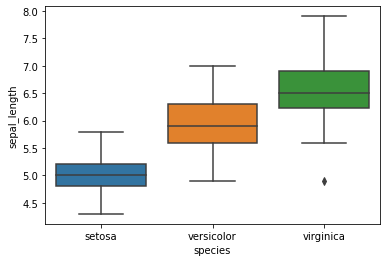

In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')

sns.boxplot( x=df["species"], y=df["sepal_length"] )

In [ ]:
df.groupby(['Crianca', 'Pclass'])['Survived'].count()

Crianca  Pclass
False    1.0       207
         2.0       170
         3.0       424
True     1.0        17
         2.0        30
         3.0        96
Name: Survived, dtype: int64

In [ ]:
df['Age'].hist()

KeyError: ignored